In [1]:
#Libs
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Function to draw an image/array
def drawDigit(data : np.ndarray) ->None:
    plt.imshow(data, cmap='gray')
    return

### Import and split Data

In [2]:
#Open Data into (2000,16,15) np.array
Data_X = np.empty([2000, 16, 15])
Data_Y = np.empty([2000,])
with open("nestor files/mfeat-pix.txt", 'r') as file:
    file = file.readlines()
    i = 0
    for line in file:
        k = 0
        l = 0
        for character in line:
            if character.isdigit():
                Data_X[i][k][l] = float(int(character)/6.0)#read digit and normalize data while reading it in!
                l+=1
                if l == 15:
                    l = 0
                    k+=1
        Data_Y[i] = int(i / 200)
        i+=1
Data_Y = tf.keras.utils.to_categorical(Data_Y)
Data_X.shape, Data_Y.shape


((2000, 16, 15), (2000, 10))

In [3]:
Data_X.min(), Data_X.max(), Data_Y.min(), Data_Y.max()

(0.0, 1.0, 0.0, 1.0)

The last entry should be a 9!


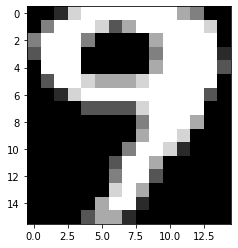

In [4]:
#Example to check it works
drawDigit(Data_X[-1])
print("The last entry should be a 9!")

Should be a [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


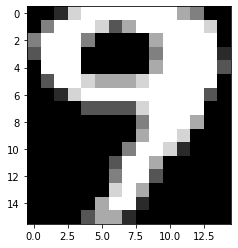

In [5]:
#Split DataSet into Testing and Training Data
TRAIN_X,TEST_X, TRAIN_Y, TEST_Y = None, None, None, None

EASY_SPLIT = False
if EASY_SPLIT:
    TRAIN_X,TEST_X, TRAIN_Y, TEST_Y = train_test_split(Data_X, Data_Y, test_size=0.2)
else:
    TRAIN_X = np.empty([1000, 16, 15])
    TRAIN_Y = np.empty([1000, 10])
    TEST_X = np.empty([1000, 16, 15])
    TEST_Y = np.empty([1000, 10])

    train_idx, test_idx, helper_idx = 0, 0, 0
    assign_to_train = True
    for sample_point in zip(Data_X, Data_Y):
        if assign_to_train:
            TRAIN_X[train_idx] = sample_point[0]
            TRAIN_Y[train_idx] = sample_point[1]
            train_idx += 1
        elif not assign_to_train:
            TEST_X[test_idx] = sample_point[0]
            TEST_Y[test_idx] = sample_point[1]
            test_idx += 1
        helper_idx += 1
        if helper_idx == 100:
            assign_to_train = False
        elif helper_idx == 200:
            assign_to_train = True
            helper_idx = 0


print(f"Should be a {TEST_Y[-1]}")
drawDigit(TEST_X[-1])

### K-Neighearest Neighbor Comparison

In [12]:
# create the labels
labels = np.zeros(2000)

# assign the labels (0-9) to the first 200 instances of each digit
for i in range(10):
    labels[i*200:(i+1)*200] = i

# reshape the data to be 2D
knn_data = Data_X.reshape(2000, 16 * 15)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(knn_data, labels, test_size=0.2, random_state=69)

# first try k = 3
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  1  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  1  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 2  0  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        41
         1.0       1.00      0.98      0.99        44
         2.0       1.00      1.00      1.00        41
         3.0       1.00      1.00      1.00        39
         4.0       1.00      0.97      0.99        35
         5.0       0.95      1.00      0.98        41
         6.0       0.97      0.97      0.97        39
         7.0       1.00      1.00      1.00        34
         8.0       1.00      0.96      0.98        46
         9.0       1.00      1.00      1.00        40

    accuracy                           0.99       400
   macro avg       

e:\Stuff\Python\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### CNN

Steps:<br>
1. Preprocess (reshape, prepare input and create solution vectors)<br>
2. Create architectures<br>
3. Train each Architecture<br>
4. Evaluate each Architecture<br>
5. Compare<br>

#### 2 - Prepare Architectures

LeCunArchitecture:
- Convolutional Layer: 6 features, 5x5 kernel
- Pooling layer: average pooling, 2x2 kernel
- Convolutional layer: 16 features, 5x5 kernel
- Pooling layer: average pooling, 2x2 kernel
- MLP layers: 2 flat layers
- Output Layer

Architecture parameters:
- conv features layer 1+2: 6(original), 4, 8, 16?
- conv layers kernel sizes: 3x3, 5x5 (higher might introduces problem due to input size)
- pooling kernels both layers: keep  on 2x2
- hideen layers: number of eurons, 16, 32?
- of learning rates r

In [6]:
class cnn_architecture:
    def __init__(self, c1_features : int = 6,#number of features in conv layer 1extracted
                 c1_kernel : int = 3,
                 c1_pooling : int = 2,
                 c2_features : int = 16, #number of features in conv layer 2 extracted
                 c2_kernel : int = 5,
                 c2_pooling : int = 2,
                 c_dropout_rate : float = 0.25, #rate of dropout after conv layers
                 f_dropout_rate : float = 0.5,#rate of dropout after fc layers
                 fc_layers : list = [],  #list containing integers which represents the number of neurons PER layer. 
                 pool_type :str = "max"
                 ):
        self.model = None
        self.evaluation = None
        self.history = None
        try:
            self.model = tf.keras.Sequential()
            #First conv+sampling layers
            self.model.add(tf.keras.layers.Conv2D(c1_features, kernel_size = c1_kernel, activation='relu', input_shape = (16,15,1)))
            if pool_type == "avg":
                self.model.add(tf.keras.layers.AveragePooling2D(pool_size = c1_pooling))
            elif pool_type == "max":
                self.model.add(tf.keras.layers.MaxPooling2D(pool_size = c1_pooling))
            #Second conv+sampling layer
            self.model.add(tf.keras.layers.Conv2D(c2_features, kernel_size = c2_kernel, activation='relu'))
            if pool_type == "avg":
                self.model.add(tf.keras.layers.AveragePooling2D(pool_size = c2_pooling))
            elif pool_type == "max":
                self.model.add(tf.keras.layers.MaxPooling2D(pool_size = c2_pooling))
            #convert to flat layer
            self.model.add(tf.keras.layers.Dropout(c_dropout_rate))
            self.model.add(tf.keras.layers.Flatten())
            #add hidden layers
            for lay in fc_layers:
                if type(lay)== int and lay > 0:
                    self.model.add(tf.keras.layers.Dense(lay, activation='relu'))
            #finalize with output layer
            self.model.add(tf.keras.layers.Dropout(f_dropout_rate))
            self.model.add(tf.keras.layers.Dense(10, activation='softmax'))
        except:
             self.model = None

    def print_architecture(self):
         if (type(self.model) == tf.keras.Sequential):
            print(self.model.summary())
    def compile_model(self, optimizer : tf.keras.optimizers = tf.keras.optimizers.RMSprop()):
        self.model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['mse', 'accuracy'])
    def train_model(self, x, y, epochs, batch, callbacks):
        self.history = self.model.fit(x=x, y=y, epochs=epochs, batch_size=batch, callbacks=callbacks)
    def test_model(self, x, y):
        self.evaluation = self.model.evaluate(x, y)

In [7]:
#parameters. careful its gonna be ugly
filters1 = (6, 12, 24)
filters2 = (8, 16, 32, 64)
pooling_types = ("max")
pooling_sizes = (2)
filter_sizes = (3,5)
hiddenneurons = ([], [20], [10, 20], [20, 20])


In [8]:
#list of model architectures
model_list = [cnn_architecture(), cnn_architecture(fc_layers=[20]), cnn_architecture(fc_layers=[10, 20]), cnn_architecture(fc_layers=[20, 20])]


#### 3 Train Architectures
- Full batch (because technically small dataset)? learning rate may be a parameter

In [17]:
#Set interessting callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
K = 5
EPOCHS = range(15,30)

Next we need hyperparameters for training including:
- k: for the number of folds in k-fold cross validation (2-10?)
- epochs (1-10?)
- batch size (10, 20, 30... 100?)

In [23]:
#Compiling models
for model in model_list:
    model.compile_model()

In [26]:
#Train models
for model in model_list:
    model.train_model(x=TRAIN_X,y=TRAIN_Y, epochs=100, batch=100, callbacks=[early_stopping_callback, tensorboard_callback])

Epoch 1/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8478 - mse: 0.0415 - accuracy: 0.6670
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.8759 - mse: 0.0425 - accuracy: 0.6620
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8235 - mse: 0.0407 - accuracy: 0.6690
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8833 - mse: 0.0438 - accuracy: 0.6390
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8546 - mse: 0.0413 - accuracy: 0.6590
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8376 - mse: 0.0407 - accuracy: 0.6780
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.8689 - mse: 0.0427 - accuracy: 0.6510
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8104 - mse: 0.0401 - accuracy: 0.6820
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8198 - mse: 0.0405 -

#### 4 Test Architectures

In [27]:
for model in model_list:
    model.test_model(x=TEST_X, y=TEST_Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2985 - mse: 0.0111 - accuracy: 0.9310


In [28]:
sorted_architectures = sorted(model_list, key=lambda x: x.evaluation)

# Print the loss of the top 5 models
for i, architecture in enumerate(sorted_architectures):
    print(f"Model {i+1}: Loss = {architecture.evaluation}")
    architecture.print_architecture()

Model 1: Loss = [0.20149695873260498, 0.008463161066174507, 0.9549999833106995]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 13, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 6, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 2, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 1, 16)          0         
                                          